In [1]:
import tensorflow as tf
import os
from tensorflow import keras

## 获取图片

In [2]:
data_root_orig = tf.keras.utils.get_file(origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
                                         fname='flower_photos', untar=True)
data_root_orig

'/Users/mac/.keras/datasets/flower_photos'

In [ ]:
# lable_list=[]
# all_paths = []
# for dirname, dirn, filenames in os.walk(data_root_orig):#通过在目录树中游走输出在目录中的文件名，向上或者向下。返回的是一个三元组(root,dirs,files)
#     lable_list.append(dirn)
#     for filename in filenames:
#         all_paths.append(os.path.join(dirname, filename))
# label_names = lable_list[0]
# print(label_names)
        
# all_image_paths= all_paths[2:]
# image_count =len(all_image_paths)
# print(image_count)
# import random
# random.shuffle(all_image_paths)
# with open(all_paths[1],'r',encoding='utf-8') as f:
#     attributions = f.readlines()[4:]
# attributions = [line.split(' CC-BY') for line in attributions]
# attributions = dict(attributions)
# # attributions
# all_image_paths


In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# attributions = {data_root_orig+'/'+k : v.split('-')[0].strip() for k,v in attributions.items()}
# print(attributions)


In [ ]:

# for k, v in attributions.items():
# #     print(k)
#     pic = plt.imread(k)
#     plt.imshow(pic)
#     plt.show()
# #     print(v)

In [3]:
import pathlib
'''见文件夹路径变为pathlib对象，以使用其方法'''
data_root = pathlib.Path(data_root_orig)
print(type(data_root))

<class 'pathlib.PosixPath'>


In [4]:
for item in data_root.iterdir():
    print(item)

/Users/mac/.keras/datasets/flower_photos/roses
/Users/mac/.keras/datasets/flower_photos/.DS_Store
/Users/mac/.keras/datasets/flower_photos/sunflowers
/Users/mac/.keras/datasets/flower_photos/daisy
/Users/mac/.keras/datasets/flower_photos/dandelion
/Users/mac/.keras/datasets/flower_photos/tulips
/Users/mac/.keras/datasets/flower_photos/LICENSE.txt


In [5]:
import random
# all_image_paths = list(data_root.glob('*/*'))#glob.glob 函数查找与特定模式匹配的文件.
all_image_paths = list(data_root.glob('**/*.jpg'))#glob.glob 函数查找与特定模式匹配的文件.

all_image_paths = [str(path) for path in all_image_paths]
random.shuffle(all_image_paths)

image_count = len(all_image_paths)
image_count

3670

In [6]:
all_image_paths[:10]

['/Users/mac/.keras/datasets/flower_photos/tulips/5665080897_0796f726c9_m.jpg',
 '/Users/mac/.keras/datasets/flower_photos/dandelion/2116997627_30fed84e53_m.jpg',
 '/Users/mac/.keras/datasets/flower_photos/roses/6473543547_4fefdbd5dc.jpg',
 '/Users/mac/.keras/datasets/flower_photos/sunflowers/4746638094_f5336788a0_n.jpg',
 '/Users/mac/.keras/datasets/flower_photos/roses/9164900485_605aa12da8.jpg',
 '/Users/mac/.keras/datasets/flower_photos/tulips/14651385476_7ccb20e594_m.jpg',
 '/Users/mac/.keras/datasets/flower_photos/daisy/12601254324_3cb62c254a_m.jpg',
 '/Users/mac/.keras/datasets/flower_photos/roses/14267691818_301aceda07.jpg',
 '/Users/mac/.keras/datasets/flower_photos/dandelion/8989067485_aab399460b_n.jpg',
 '/Users/mac/.keras/datasets/flower_photos/roses/3576488381_611f3446e0_n.jpg']

# 检查图片

### 现在让我们快速浏览几张图片，这样你知道你在处理什么：

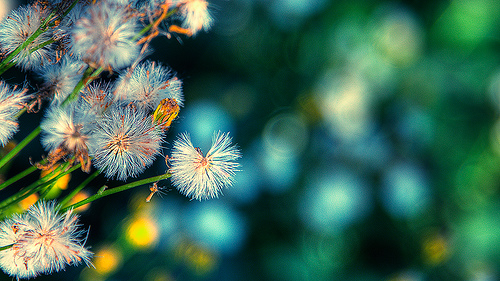

Image (CC BY 2.0)  by Adam Baker



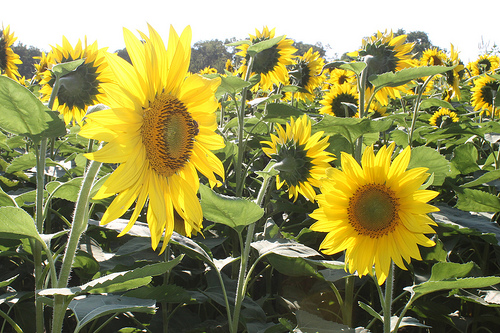

Image (CC BY 2.0)  by Sue Reynolds



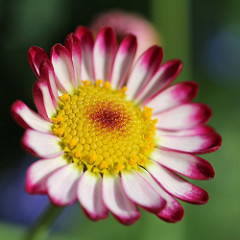

Image (CC BY 2.0)  by Gytha69



In [7]:
# 预览图片
attributions = (data_root/"LICENSE.txt").open(encoding='utf-8').readlines()[4:]
attributions = [line.split(' CC-BY') for line in attributions]
attributions = dict(attributions)

def caption_image(image_path):
    image_rel = pathlib.Path(image_path).relative_to(data_root)
    return "Image (CC BY 2.0) " + ' - '.join(attributions[str(image_rel)].split(' - ')[:-1])

import IPython.display as display

for n in range(3):
    image_path = random.choice(all_image_paths)
    display.display(display.Image(image_path))
    print(caption_image(image_path))
    print()


## 确定每张图片的标签

### 列出可用的标签：

In [8]:
label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
label_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [49]:
# 为每个标签分配索引：
label_to_index = dict((name, index) for index, name in enumerate(label_names))
label_to_index

SyntaxError: invalid character in identifier (<ipython-input-49-2999e692157e>, line 1)

In [50]:
# 创建一个列表，包含每个文件的标签索引：
# all_image_labels = [label_to_index[pathlib.Path(path).parent.name]
#                     for path in all_image_paths]


all_image_labels = [label_to_index[i.split('/')[-2]] for i in all_image_paths]
print("First 10 labels indices: ", all_image_labels[:10])



First 10 labels indices:  [4, 1, 2, 3, 2, 4, 0, 2, 1, 2]


# 加载和格式化图片

### TensorFlow 包含加载和处理图片时你需要的所有工具：

In [11]:

img_path = all_image_paths[0]
img_path

'/Users/mac/.keras/datasets/flower_photos/tulips/5665080897_0796f726c9_m.jpg'

In [12]:
# 以下是原始数据
img_raw = tf.io.read_file(img_path)
print(repr(img_raw)[:100]+"...")

<tf.Tensor: id=1, shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x...


In [13]:
# 将它解码为图像 tensor（张量）
img_tensor = tf.image.decode_image(img_raw)

print(img_tensor.shape)
print(img_tensor.dtype)

(240, 162, 3)
<dtype: 'uint8'>


In [14]:
# img_1 = plt.imread(all_image_paths[0])
# img_tensor = tf.constant(img_1)
# print(img_tensor.shape)
# print(img_tensor.dtype)

NameError: name 'plt' is not defined

In [51]:
# 示例：根据你的模型调整其大小： tf.image.resize
img_final = tf.image.resize(img_tensor, [192, 192])
img_final = img_final/255.0
print(img_final.shape)
print(img_final.numpy().min())
print(img_final.numpy().max())


(192, 192, 3)
0.0
0.9841912


In [15]:
# 创建预处理函数
def preprocess_image(image):
    '''图像调整大小并将数值缩放到0-1之间'''
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [192, 192])
    image /= 255.0  # normalize to [0,1] range
    return image

def load_and_preprocess_image(path):
    '''加载并预处理图像'''
    image = tf.io.read_file(path)
    return preprocess_image(image)

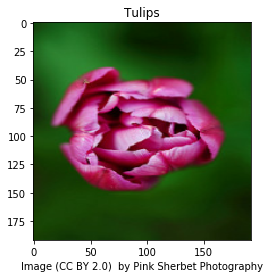

In [17]:
# 测试：
import matplotlib.pyplot as plt

image_path = all_image_paths[0]
label = all_image_labels[0]

plt.imshow(load_and_preprocess_image(img_path))
plt.grid(False)
plt.xlabel(caption_image(img_path))
plt.title(label_names[label].title())
print()

# 构建一个 tf.data.Dataset
## 一个图片数据集

## 构建 tf.data.Dataset 最简单的方法就是使用 from_tensor_slices 方法。

## 将字符串数组切片，得到一个字符串数据集：

In [18]:
path_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)
print(path_ds)

<TensorSliceDataset shapes: (), types: tf.string>


## 创建一个新的数据集，通过在路径数据集上映射 preprocess_image 来动态加载和格式化图片

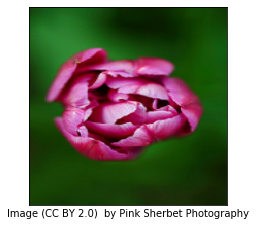

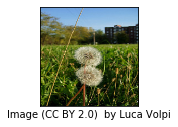

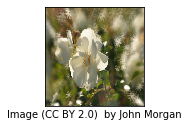

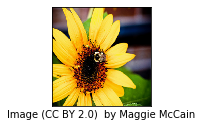

In [19]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
# ,tf.data.experimental.AUTOTUNE可以让程序自动的选择最优的线程并行个数
image_ds = path_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)

import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
for n, image in enumerate(image_ds.take(4)):
    plt.subplot(2,2,n+1)
    plt.imshow(image)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(caption_image(all_image_paths[n]))
    plt.show()

## 一个(图片, 标签)对数据集

### 使用同样的 from_tensor_slices 方法你可以创建一个标签数据集：



In [20]:
# tf.cast()函数的作用是执行tensorflow中张量数据类型转换,比如读入的图片如果是int8类型的,一般在要在训练前把图像的数据格式转换为float32。
label_ds = tf.data.Dataset.from_tensor_slices(tf.cast(all_image_labels, tf.int64))
for label in label_ds.take(10):
    print(label_names[label.numpy()])

tulips
dandelion
roses
sunflowers
roses
tulips
daisy
roses
dandelion
roses


### 由于这些数据集顺序相同，你可以将他们打包在一起得到一个(图片, 标签)对数据集：

In [21]:
image_label_ds = tf.data.Dataset.zip((image_ds, label_ds))
print(image_label_ds)
# 这个新数据集的 shapes（维数） 和 types（类型） 也是维数和类型的元组，用来描述每个字段：

<ZipDataset shapes: ((192, 192, 3), ()), types: (tf.float32, tf.int64)>


### 另一种创建datasets的方法：当你拥有形似 all_image_labels 和 all_image_paths 的数组，tf.data.dataset.Dataset.zip 的替代方法是将这对数组切片。

In [55]:
ds = tf.data.Dataset.from_tensor_slices((all_image_paths, all_image_labels))

# 元组被解压缩到映射函数的位置参数中
def load_and_preprocess_from_path_label(path, label):
  return load_and_preprocess_image(path), label

image_label_ds = ds.map(load_and_preprocess_from_path_label)
image_label_ds

<MapDataset shapes: ((192, 192, 3), ()), types: (tf.float32, tf.int32)>

## 训练的基本方法

### 要使用此数据集训练模型，你将会想要数据：

### 被充分打乱。
### 被分割为 batch。
### 永远重复。
### 尽快提供 batch。
### 使用 tf.data api 可以轻松添加这些功能。

In [56]:
BATCH_SIZE = 32

# 设置一个和数据集大小一致的 shuffle buffer size（随机缓冲区大小）以保证数据被充分打乱。
ds = image_label_ds.shuffle(buffer_size=image_count).repeat().batch(BATCH_SIZE)

# 当模型在训练的时候，`prefetch` 使数据集在后台取得 batch。
ds = ds.prefetch(buffer_size=AUTOTUNE)
ds

<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int32)>

## 这里有一些注意事项：

### 1、顺序很重要。
#### 在 .repeat 之后 .shuffle，会在 epoch 之间打乱数据（当有些数据出现两次的时候，其他数据还没有出现过）。
#### 在 .batch 之后 .shuffle，会打乱 batch 的顺序，但是不会在 batch 之间打乱数据。
### 2、你在完全打乱中使用和数据集大小一样的 buffer_size（缓冲区大小）。较大的缓冲区大小提供更好的随机化，但使用更多的内存，直到超过数据集大小。
### 3、在从随机缓冲区中拉取任何元素前，要先填满它。所以当你的 Dataset（数据集）启动的时候一个大的 buffer_size（缓冲区大小）可能会引起延迟。
### 4、在随机缓冲区完全为空之前，被打乱的数据集不会报告数据集的结尾。Dataset（数据集）由 .repeat 重新启动，导致需要再次等待随机缓冲区被填满。

## 方法2；最后一点还可以通过使用 tf.data.Dataset.apply 方法和融合过的 tf.data.experimental.shuffle_and_repeat 函数来解决:

In [24]:
ds = image_label_ds.apply(
  tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
ds = ds.batch(BATCH_SIZE)
ds = ds.prefetch(buffer_size=AUTOTUNE)
ds

Instructions for updating:
Use `tf.data.Dataset.shuffle(buffer_size, seed)` followed by `tf.data.Dataset.repeat(count)`. Static tf.data optimizations will take care of using the fused implementation.


<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int32)>

# 传递数据集至模型

### 从 tf.keras.applications 取得 MobileNet v2 副本。

### 该模型副本会被用于一个简单的迁移学习例子。

### 设置 MobileNet 的权重为不可训练：

In [25]:
mobile_net = tf.keras.applications.MobileNetV2(input_shape=(192, 192, 3), include_top=False)
mobile_net.trainable=False

## 在你将输出传递给 MobilNet 模型之前，你需要将其范围从 [0,1] 转化为 [-1,1]：



In [57]:
def change_range(image,label):
    '''将值范围从 [0,1] 转化为 [-1,1]'''
    return 2*image-1, label

keras_ds = ds.map(change_range)

## MobileNet 为每张图片的特征返回一个 6x6 的空间网格。

### 传递一个 batch 的图片给它，查看结果：

In [27]:
#实验：
# 数据集可能需要几秒来启动，因为要填满其随机缓冲区。
image_batch, label_batch = next(iter(keras_ds))
feature_map_batch = mobile_net(image_batch)
print(feature_map_batch.shape)

(32, 6, 6, 1280)


In [28]:
# 构建一个包装了 MobileNet 的模型
# 并在 tf.keras.layers.Dense 输出层之前使用 tf.keras.layers.GlobalAveragePooling2D 来平均那些空间向量：
model = tf.keras.Sequential([
                            mobile_net,
                            tf.keras.layers.GlobalAveragePooling2D(),
                            tf.keras.layers.Dense(len(label_names), activation = 'softmax')])

In [59]:
# 现在它产出符合预期 shape(维数)的输出：

logit_batch = model(image_batch).numpy()

print("min logit:", logit_batch.min())
print("max logit:", logit_batch.max())
print()

print("Shape:", logit_batch.shape)

min logit: 0.0067478237
max logit: 0.7610631

Shape: (32, 5)


In [30]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=["accuracy"])

# 此处有两个可训练的变量 —— Dense 层中的 weights（权重） 和 bias（偏差）：
len(model.trainable_variables)

2

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_192 (Model) (None, 6, 6, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


## 准备好来训练模型了。

### 注意，出于演示目的每一个 epoch 中你将只运行 3 step，
### 但一般来说在传递给 model.fit() 之前你会指定 step 的真实数量，如下所示

In [32]:
steps_per_epoch=tf.math.ceil(len(all_image_paths)/BATCH_SIZE).numpy()
# 方法:floor取小(向下取整),ceil取大(向上取整),round四舍五入
steps_per_epoch

115.0

In [33]:
model.fit(ds, epochs=10, steps_per_epoch=115)

Train for 3 steps
3/3 [==============================] - 44s 15s/step - loss: 1.9182 - accuracy: 0.2292


# 性能
#### 注意：这部分只是展示一些可能帮助提升性能的简单技巧。深入指南，请看：输入 pipeline（管道）的性能。

## 上面使用的简单 pipeline（管道）在每个 epoch 中单独读取每个文件。在本地使用 CPU 训练时这个方法是可行的，但是可能不足以进行 GPU 训练并且完全不适合任何形式的分布式训练。

## 要研究这点，首先构建一个简单的函数来检查数据集的性能：



In [34]:
import time
default_timeit_steps = 2*steps_per_epoch+1

def timeit(ds, steps=default_timeit_steps):
  overall_start = time.time()
  # 在开始计时之前
  # 取得单个 batch 来填充 pipeline（管道）（填充随机缓冲区）
  it = iter(ds.take(steps+1))
  next(it)

  start = time.time()
  for i,(images,labels) in enumerate(it):
    if i%10 == 0:
      print('.',end='')
  print()
  end = time.time()

  duration = end-start
  print("{} batches: {} s".format(steps, duration))
  print("{:0.5f} Images/s".format(BATCH_SIZE*steps/duration))
  print("Total time: {}s".format(end-overall_start))

In [35]:
# 当前数据集的性能是：
ds = image_label_ds.apply(
  tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
ds = ds.batch(BATCH_SIZE).prefetch(buffer_size=AUTOTUNE)
ds

<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int32)>

In [36]:
timeit(ds)

........................
231.0 batches: 35.14441919326782 s
210.33211 Images/s
Total time: 55.04520916938782s


## 缓存

### 使用 tf.data.Dataset.cache 在 epoch 之间轻松缓存计算结果。这是非常高效的，特别是当内存能容纳全部数据时。

### 在被预处理之后（解码和调整大小），图片在此被缓存了：

In [37]:
ds = image_label_ds.cache()# 先缓存到内存
ds = ds.apply(
  tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
ds = ds.batch(BATCH_SIZE).prefetch(buffer_size=AUTOTUNE)
ds

<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int32)>

In [38]:
timeit(ds)

........................
231.0 batches: 0.8612918853759766 s
8582.45634 Images/s
Total time: 17.66000509262085s


## 使用内存缓存的一个缺点是必须在每次运行时重建缓存，这使得每次启动数据集时有相同的启动延迟：使用缓存文件可以解决这个问题。

In [39]:
timeit(ds)

........................
231.0 batches: 0.878363847732544 s
8415.64691 Images/s
Total time: 0.9463276863098145s


## 如果内存不够容纳数据，使用一个缓存文件：

In [40]:
ds = image_label_ds.cache(filename='./cache.tf-data')
ds = ds.apply(
  tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
ds = ds.batch(BATCH_SIZE).prefetch(1)
ds

<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int32)>

In [41]:
timeit(ds)

........................
231.0 batches: 22.924010038375854 s
322.45667 Images/s
Total time: 66.872642993927s


## 这个缓存文件也有可快速重启数据集而无需重建缓存的优点。注意第二次快了多少：

In [ ]:
timeit(ds)

# TFRecord 文件

## 原始图片数据

## TFRecord 文件是一种用来存储一串二进制 blob 的简单格式。通过将多个示例打包进同一个文件内，TensorFlow 能够一次性读取多个示例，当使用一个远程存储服务，如 GCS 时，这对性能来说尤其重要。



In [42]:
# 首先，从原始图片数据中构建出一个 TFRecord 文件：
image_ds = tf.data.Dataset.from_tensor_slices(all_image_paths).map(tf.io.read_file)
tfrec = tf.data.experimental.TFRecordWriter('images.tfrec')
tfrec.write(image_ds)

# 接着，构建一个从 TFRecord 文件读取的数据集，并使用你之前定义的 preprocess_image 函数对图像进行解码/重新格式化
image_ds = tf.data.TFRecordDataset('images.tfrec').map(preprocess_image)

# 压缩该数据集和你之前定义的标签数据集以得到期望的 (图片,标签) 对：
ds = tf.data.Dataset.zip((image_ds, label_ds))
ds = ds.apply(
  tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
ds=ds.batch(BATCH_SIZE).prefetch(AUTOTUNE)
ds

<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int64)>

In [43]:
timeit(ds)
# 这比 缓存 版本慢，因为你还没有缓存预处理。

........................
231.0 batches: 32.397669076919556 s
228.16456 Images/s
Total time: 50.00796985626221s


# 序列化的 Tensor（张量）

## 要为 TFRecord 文件省去一些预处理过程，首先像之前一样制作一个处理过的图片数据集：

In [44]:
# 首先像之前一样制作一个处理过的图片数据集：
paths_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)
image_ds = paths_ds.map(load_and_preprocess_image)
image_ds

<MapDataset shapes: (192, 192, 3), types: tf.float32>

## 现在你有一个 tensor（张量）数据集，而不是一个 .jpeg 字符串数据集。

### 要将此序列化至一个 TFRecord 文件你首先将该 tensor（张量）数据集转化为一个字符串数据集：

In [45]:
ds = image_ds.map(tf.io.serialize_tensor)
ds

<MapDataset shapes: (), types: tf.string>

In [61]:
tfrec = tf.data.experimental.TFRecordWriter('images.tfrec')
tfrec.write(ds)

AttributeError: 'tuple' object has no attribute 'is_compatible_with'

## 有了被缓存的预处理，就能从 TFrecord 文件高效地加载数据——只需记得在使用它之前反序列化：

In [46]:
tfrec = tf.data.experimental.TFRecordWriter('images.tfrec')
tfrec.write(ds)
ds = tf.data.TFRecordDataset('images.tfrec')

def parse(x):
  result = tf.io.parse_tensor(x, out_type=tf.float32)
  result = tf.reshape(result, [192, 192, 3])
  return result

ds = ds.map(parse, num_parallel_calls=AUTOTUNE)
ds

<ParallelMapDataset shapes: (192, 192, 3), types: tf.float32>

In [47]:
# 现在，像之前一样添加标签和进行相同的标准操作：

ds = tf.data.Dataset.zip((ds, label_ds))
ds = ds.apply(
  tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
ds=ds.batch(BATCH_SIZE).prefetch(AUTOTUNE)
ds

<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int64)>

In [48]:
timeit(ds)

........................
231.0 batches: 15.615679025650024 s
473.37039 Images/s
Total time: 22.444753170013428s
